In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('LMR_VOCdata_97-19_DOW.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S',errors='coerce')



In [26]:
# code to select data from within a time period
# dates to be in the form: '%Y-%m-%d %H:%M:%S'
def select_data(start_date,end_date):
    mask = (df['Datetime'] > start_date) & (df['Datetime'] < end_date)
    data = df.loc[mask]
    return data 

In [30]:
# ethane and propane ratio looks weird between this period so investigating this futher
ethane_propane = select_data('2012/1/1','2017')
ethane_propane['ratio'] = ethane_propane['ethane'] / ethane_propane['propane']

<ipython-input-30-1379b1a6dcd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethane_propane['ratio'] = ethane_propane['ethane'] / ethane_propane['propane']


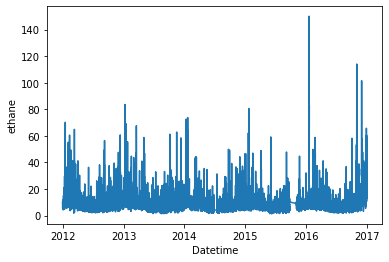

In [28]:
sns.lineplot(data=ethane_propane,x='Datetime',y='ethane')


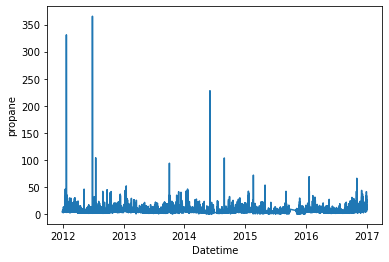

In [23]:
sns.lineplot(data=ethane_propane,x='Datetime',y='propane')

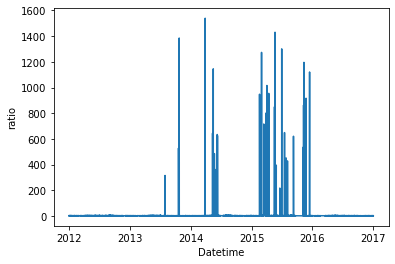

In [31]:
sns.lineplot(data=ethane_propane,x='Datetime',y='ratio')

<ipython-input-51-1db476076628>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stormy2018['ratio'] = stormy2018['Nitric oxide'] / stormy2018['Nitrogen dioxide']


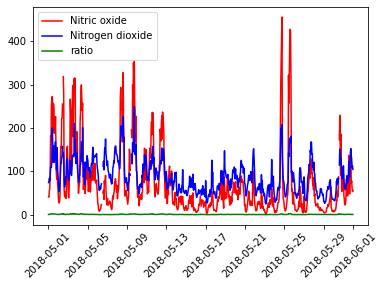

In [51]:
# there was a storm on the 26th may 2018 (lots of lightning) 
stormy2018 = select_data('2018/05','2018/06')
stormy2018['ratio'] = stormy2018['Nitric oxide'] / stormy2018['Nitrogen dioxide']
plt.plot(stormy2018['Datetime'],stormy2018['Nitric oxide'],color='r',label='Nitric oxide')
plt.plot(stormy2018['Datetime'],stormy2018['Nitrogen dioxide'],color='b',label='Nitrogen dioxide')
plt.plot(stormy2018['Datetime'],stormy2018['ratio'],color='g',label='ratio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-fa599d5d3478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stormy2014['ratio'] = stormy2014['Nitric oxide'] / stormy2014['Nitrogen dioxide']


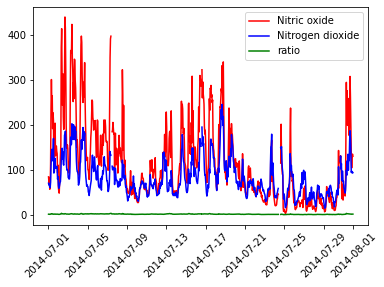

In [52]:
# another thunder storm 18th july 2014 but weirdly looks like more was going on at the begining of the month
stormy2014 = select_data('2014/07','2014/08')
stormy2014['ratio'] = stormy2014['Nitric oxide'] / stormy2014['Nitrogen dioxide']
plt.plot(stormy2014['Datetime'],stormy2014['Nitric oxide'],color='r',label='Nitric oxide')
plt.plot(stormy2014['Datetime'],stormy2014['Nitrogen dioxide'],color='b',label='Nitrogen dioxide')
plt.plot(stormy2014['Datetime'],stormy2014['ratio'],color='g',label='ratio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [68]:
corr['benzene'].sort_values(ascending =False)

Ozone                            -0.246534
propane                           0.196506
ethane                            0.232973
Nitrogen dioxide                  0.248350
Nitric oxide                      0.478274
Sulphur dioxide                   0.566531
cis-2-pentene (VOC-AIR only)      0.586694
1,2,4-trimethylbenzene            0.621144
n-heptane                         0.629502
ethylbenzene                      0.633329
trans-2-pentene                   0.649538
isoprene                          0.726549
m+p-xylene                        0.726630
1,3,5-trimethylbenzene            0.788013
Carbon monoxide                   0.797709
ethyne                            0.798176
o-xylene                          0.805815
n-hexane                          0.816503
n-butane                          0.835750
n-pentane                         0.841624
cis-2-butene                      0.852467
3-methylpentane (VOC-AIR only)    0.853302
iso-butane                        0.853461
1-butene   

In [67]:
corr['ethene'].sort_values(ascending=False)

ethene                            1.000000
propene                           0.984076
toluene                           0.952474
benzene                           0.948488
2-methylpentane                   0.917947
iso-pentane                       0.911426
1,3-butadiene                     0.897942
trans-2-butene                    0.892806
1-butene                          0.874175
iso-butane                        0.870673
n-pentane                         0.870355
ethyne                            0.864656
Carbon monoxide                   0.862189
3-methylpentane (VOC-AIR only)    0.851319
o-xylene                          0.845812
cis-2-butene                      0.845020
n-butane                          0.818406
1,3,5-trimethylbenzene            0.800867
n-hexane                          0.791361
m+p-xylene                        0.765689
isoprene                          0.688973
ethylbenzene                      0.657458
1,2,4-trimethylbenzene            0.635930
trans-2-pen

In [12]:
t = df.T
t['vocs'] = t.index
t.columns = t.iloc[0]
t.drop(index='Datetime', axis=1, inplace=True) 

Datetime                       1997-07-17 01:00:00 1997-07-17 02:00:00  \
Ozone                                            2                 NaN   
Nitric oxide                                    98                 159   
Nitrogen dioxide                                69                  71   
Sulphur dioxide                                 16                 NaN   
Carbon monoxide                                1.9                 NaN   
ethane                                         NaN                 NaN   
ethene                                         NaN                 NaN   
ethyne                                         NaN                 NaN   
propane                                        NaN                 NaN   
propene                                        NaN                 NaN   
iso-butane                                     NaN                 NaN   
n-butane                                       NaN                 NaN   
1-butene                                       NaN                 NaN   
trans-2-butene                                 NaN                 NaN   
cis-2-butene                                   NaN                 NaN   
iso-pentane                                    NaN                 NaN   
n-pentane                                      NaN                 NaN   
1,3-butadiene                                  NaN                 NaN   
trans-2-pentene                                NaN                 NaN   
cis-2-pentene (VOC-AIR only)                   NaN                 NaN   
2-methylpentane                                NaN                 NaN   
3-methylpentane (VOC-AIR only)                 NaN                 NaN   
isoprene                                       NaN                 NaN   
n-hexane                                       NaN                 NaN   
n-heptane                                      NaN                 NaN   
benzene                                        NaN                 NaN   
toluene                                        NaN                 NaN   
ethylbenzene                                   NaN                 NaN   
m+p-xylene                                     NaN                 NaN   
o-xylene                                       NaN                 NaN   
1,2,4-trimethylbenzene                         NaN                 NaN   
1,3,5-trimethylbenzene                         NaN                 NaN   
Wind Direction                                 NaN                 NaN   
Wind Speed                                     NaN                 NaN   

Datetime                       1997-07-17 03:00:00 1997-07-17 04:00:00  \
Ozone                                            2                   2   
Nitric oxide                                   NaN                 151   
Nitrogen dioxide                               NaN                  61   
Sulphur dioxide                                 24                  24   
Carbon monoxide                                1.9                 1.6   
ethane                                         NaN                 NaN   
ethene                                         NaN                 NaN   
ethyne                                         NaN                 NaN   
propane                                        NaN                 NaN   
propene                                        NaN                 NaN   
iso-butane                                     NaN                 NaN   
n-butane                                       NaN                 NaN   
1-butene                                       NaN                 NaN   
trans-2-butene                                 NaN                 NaN   
cis-2-butene                                   NaN                 NaN   
iso-pentane                                    NaN                 NaN   
n-pentane                                      NaN                 NaN   
1,3-butadiene                                  NaN                 NaN   
tra

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

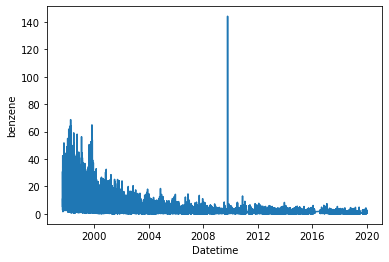

In [16]:
sns.lineplot(data=df, x='Datetime',y='benzene')

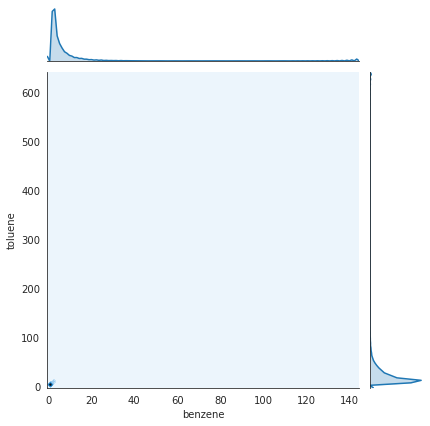

In [15]:
with sns.axes_style('white'):
    sns.jointplot("benzene", "toluene", df, kind='kde');

In [ ]:
df['']